In [1]:
conda install -c anaconda pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\proyas.bose\Anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.0                |           py37_0         3.1 MB  anaconda
    pandas-datareader-0.9.0    |             py_0          72 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  pandas-datareader  anaconda/noarch::pandas-datareader-0.9.0-py_0

The following packages will be UPDATED:

  conda              conda-forge::conda-4.8.3-py37hc8dfbb8~ --> anaconda::conda-4.9.0-py37_0




conda-4.9.0          | 3.1 MB    |            |   0% 
conda-4.9.0          | 3.1 MB    |            |   0% 
conda-4.9.0          | 3.1 MB    | 6          

In [4]:
#### Packages Used
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
plt.style.use("fivethirtyeight")

In [5]:
### Collection of the Stock Symbols
stocksymbols = ["FB","AMZN","GOOGL","NFLX","AAPL"]
stocksymbols

['FB', 'AMZN', 'GOOGL', 'NFLX', 'AAPL']

In [6]:
stockstartDate  = "2015-01-01"  #### Starting Date
stockstartDate

'2015-01-01'

In [7]:
### As our ending date
today = datetime.today().strftime("%Y-%m-%d") ### we will analyse uptil today
today

'2021-01-02'

In [8]:
#### Assets
netassets = len(stocksymbols)
netassets

5

In [9]:
##### Collect the data from the web 
def getmyportfolio(stocks = stocksymbols, start = stockstartDate,end =today,col = 'Adj Close'):
    data = web.DataReader(stocks,data_source='yahoo',start = start,end =end)[col]
    return data

In [10]:
my_stocks = getmyportfolio(stocksymbols)
my_stocks

Symbols,FB,AMZN,GOOGL,NFLX,AAPL
Date,,,,,
2014-12-31,78.019997,310.350006,530.659973,48.801430,25.137676
2015-01-02,78.449997,308.519989,529.549988,49.848572,24.898552
2015-01-05,77.190002,302.190002,519.460022,47.311428,24.197117
2015-01-06,76.150002,295.290009,506.640015,46.501427,24.199400
2015-01-07,76.150002,298.420013,505.149994,46.742859,24.538729
...,...,...,...,...,...
2020-12-24,267.399994,3172.689941,1734.160034,513.969971,131.970001
2020-12-28,277.000000,3283.959961,1773.959961,519.119995,136.690002
2020-12-29,276.779999,3322.000000,1757.760010,530.869995,134.869995


In [13]:
def showgraph(stocks = stocksymbols, start = stockstartDate,end =today,col = 'Adj Close'):
    plt.figure(figsize = (12,6))
    my_stocks = getmyportfolio(stocks = stocksymbols, start = start,end =end,col = col)
    for c in my_stocks.columns.values:
        plt.plot(my_stocks[c],label = c)
    plt.title("Stock Portfolio Analysis")
    plt.xlabel("Date")
    plt.ylabel(col + "PriceUS$")
    plt.legend(my_stocks.columns.values,loc = "upper left")
    plt.show()

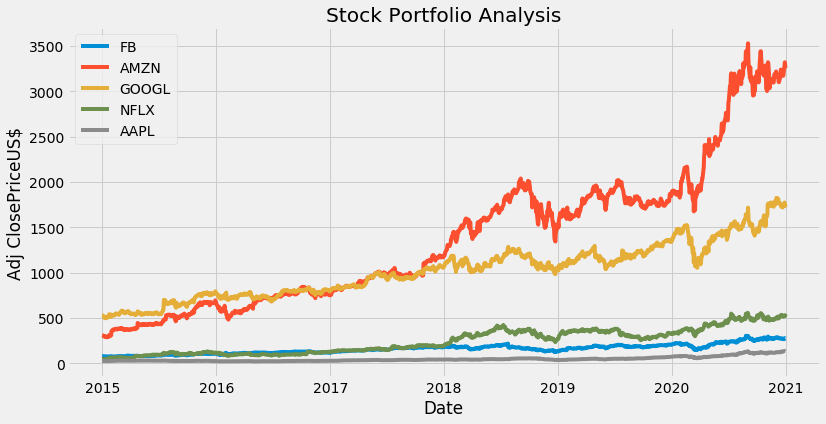

In [14]:
showgraph(stocksymbols)

In [33]:
### Calculate Simple returns
daily_simple_returns = my_stocks.pct_change(1)  #### for 1 day
daily_simple_returns*100

Symbols,FB,AMZN,GOOGL,NFLX,AAPL
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.551141,-0.589662,-0.209171,2.145720,-0.951259
2015-01-05,-1.606112,-2.051727,-1.905385,-5.089702,-2.817172
2015-01-06,-1.347326,-2.283330,-2.467949,-1.712063,0.009435
2015-01-07,0.000000,1.059977,-0.294099,0.519193,1.402220
...,...,...,...,...,...
2020-12-24,-0.264814,-0.394945,0.343129,-0.099131,0.771224
2020-12-28,3.590130,3.507119,2.295055,1.002009,3.576571
2020-12-29,-0.079423,1.158359,-0.913208,2.263446,-1.331485


In [27]:
daily_simple_returns

Symbols,FB,AMZN,GOOGL,NFLX,AAPL
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-12-24,-0.034378,0.017520,-0.016860,0.064384,0.145871
2020-12-28,0.005116,0.031048,0.005572,0.070351,0.178057
2020-12-29,-0.003708,0.039639,-0.016374,0.080409,0.156789


In [21]:
daily_simple_returns.columns

Index(['FB', 'AMZN', 'GOOGL', 'NFLX', 'AAPL'], dtype='object', name='Symbols')

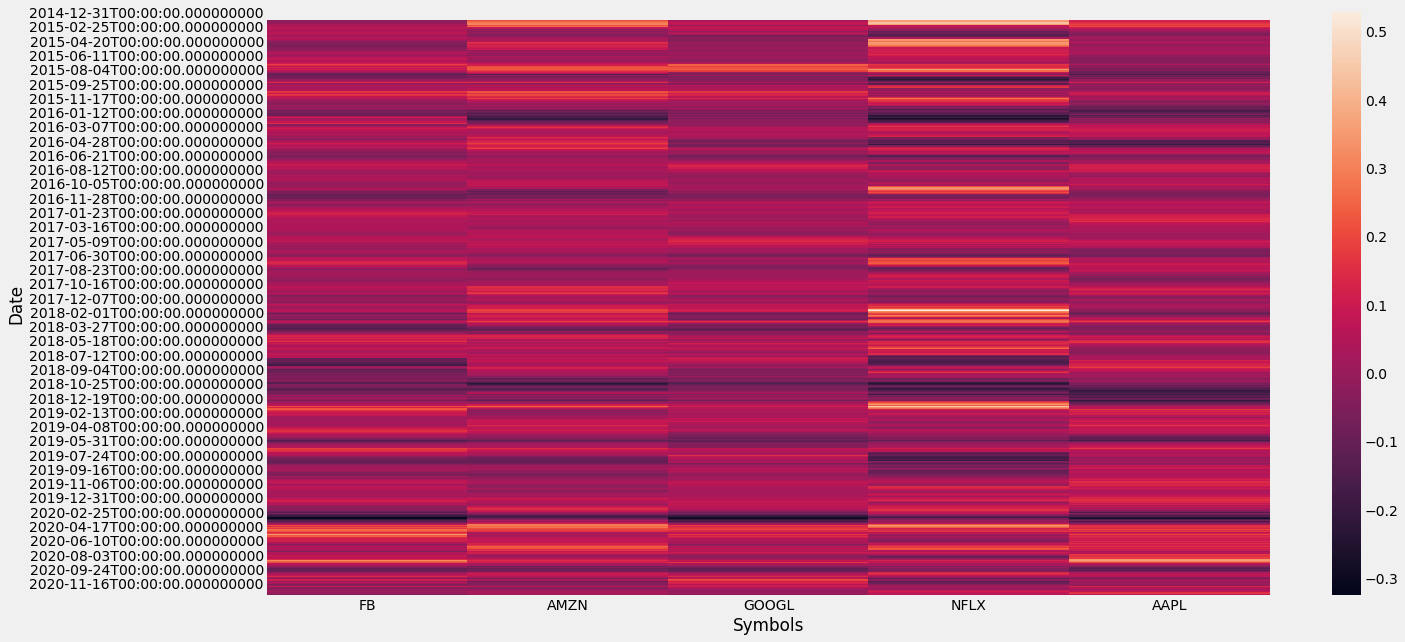

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(daily_simple_returns)

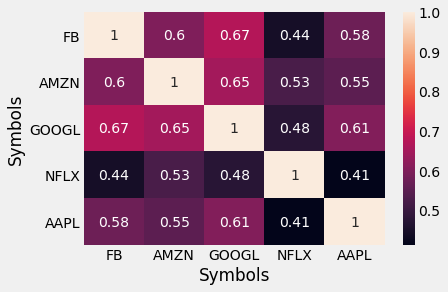

In [36]:
####
sns.heatmap(daily_simple_returns.corr(),annot = True)

In [37]:
#### Volatility of the Stocks
daily_simple_returns.std()

Symbols
FB       0.020060
AMZN     0.019514
GOOGL    0.016870
NFLX     0.026739
AAPL     0.018662
dtype: float64

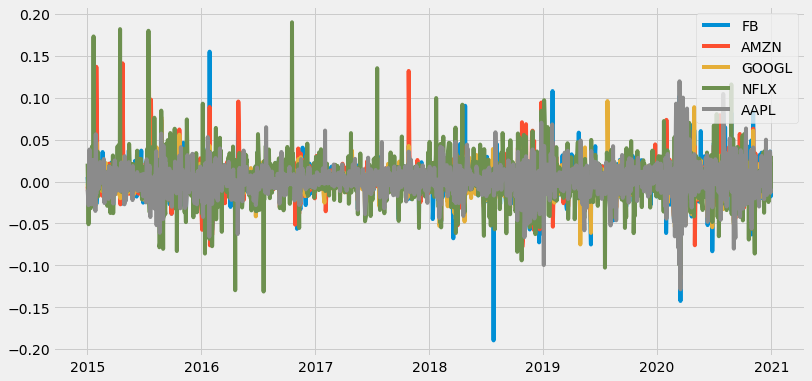

In [42]:
plt.figure(figsize = (12,6))
for c in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index,daily_simple_returns[c])
plt.legend(daily_simple_returns.columns.values,loc = "upper right")
plt.show()

In [ ]:
my_stocks.to_csv("E://")